In [1]:
import matplotlib  # 导入图表模块
import matplotlib.pyplot as plt  # 导入绘图模块

        

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']    # 避免中文乱码
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
%matplotlib inline

# 1 折线图

### 练习1-1： 读入city_temperature.csv，绘制1995-2019年期间全球平均气温变化趋势
1. 读入city_temperature.csv，将所有的空值的行删除，结果保存至data1中
2. 查询1995-2019年的气温，只要'Year','AvgTemperature'列，结果保存至data2
3. 对data2，以Year为依据，分组统计AvgTemperature的平均值
4. 取统计结果中行索引为x轴数据，AvgTemperature的平均值为Y轴数据，图例文本为“全球平均温度”，绘制折线图
5. 设置x轴标题为“年份”，y轴标题为“年均气温”，图表标题为“1995-2019年全球年均气温变化”。
6. 添加图例

In [4]:
#完成第1题
import pandas as pd
data1=pd.read_csv(r'.\city_temperature.csv',engine='python')
data1.dropna(inplace=True)
data1.head()

,City,Region,Country,Month,Day,Year,AvgTemperature
0,Algiers,Africa,Algeria,1,1,1995.0,64.2
1,Algiers,Africa,Algeria,1,2,1995.0,49.4
2,Algiers,Africa,Algeria,1,3,1995.0,48.8
3,Algiers,Africa,Algeria,1,4,1995.0,46.4
4,Algiers,Africa,Algeria,1,5,1995.0,47.9


In [5]:
#完成第2、3题
data2=data1.loc[ data1['Year'].between(1995,2019),['Year','AvgTemperature']]
xy=data2.groupby(by='Year').mean()

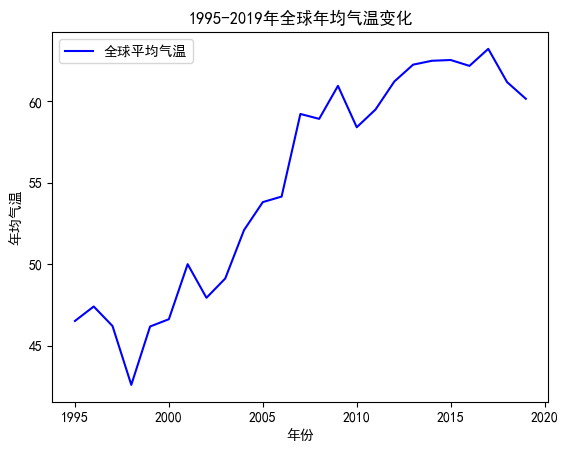

In [81]:
#完成绘图
plt.title('1995-2019年全球年均气温变化')
plt.xlabel('年份')
plt.ylabel('年均气温')
plt.plot(xy.index,xy.values,color='blue',label='全球平均气温')
plt.legend()

plt.show()









### 练习1-2：在同一张图里面添加绘制1995-2019年期间最高气温、最低气温变化趋势
1、对data2，以Year为依据，分组统计AvgTemperature的最大值、最小值
2、取统计结果中行索引为x轴数据，AvgTemperature的平均值、最大值、最小值为Y轴数据，图例文本分别为“全球平均温度”、“全球最高温度”、“全球最低温度”，绘制折线图
3. 设置x轴标题为“年份”，y轴标题为“年均气温”，图表标题为“1995-2019年全球年均气温变化”。
4. 添加图例

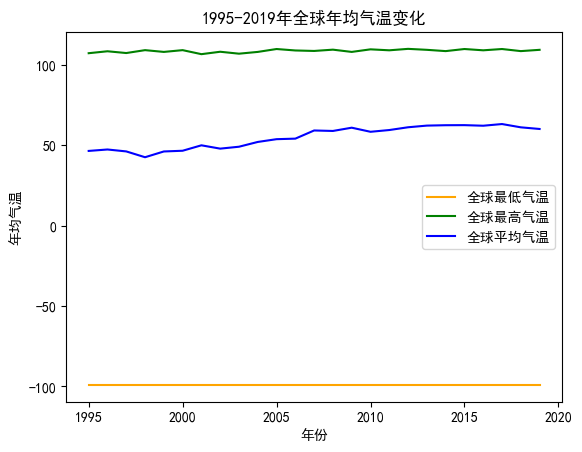

In [10]:
#求1995-2019年期间最高气温、最低气温
data2=data1.loc[ data1['Year'].between(1995,2019),['Year','AvgTemperature']]
xy_min=data2.groupby(by='Year').min()
xy_max=data2.groupby(by='Year').max()

y_min=xy_min.values
y_max=xy_max.values

#画图
plt.plot(xy_min.index,y_min,color='orange',label='全球最低气温')
plt.plot(xy_max.index,y_max,color='green',label='全球最高气温')
plt.plot(xy.index,xy.values,color='blue',label='全球平均气温')
plt.title("1995-2019年全球年均气温变化")
plt.xlabel('年份')
plt.ylabel('年均气温')
plt.legend(loc='center right')
plt.show()









# 3 直条图

### 练习3-1：全球变暖对于高纬度国家（即靠近南极和北极的国家）影响更为显著。以北欧Finland（芬兰）为例，按年统计1995-2020年期间日均气温低于40F的天数，

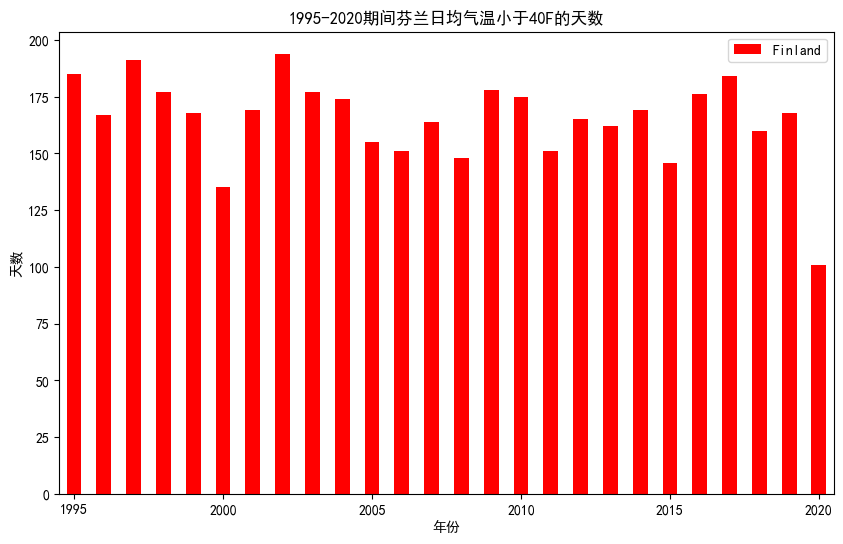

In [79]:
import numpy as np
fig_data =data1[(data1['Country']=="Finland") & (data1['AvgTemperature']<40)][['Year','AvgTemperature']].groupby('Year')['AvgTemperature'].count()
plt.figure(figsize=(10,6))
plt.margins(x=0.01)
#画图
plt.title('1995-2020期间芬兰日均气温小于40F的天数')
plt.xlabel('年份')
plt.ylabel('天数')
plt.bar(fig_data.index, fig_data.values, color='red',width=0.5,label='Finland')
plt.legend(loc='upper right')
plt.show()













### 练习3-2 ：统计各年（Finland、New Zealand）日均气温低于40F的天数，绘制在一张柱形图上

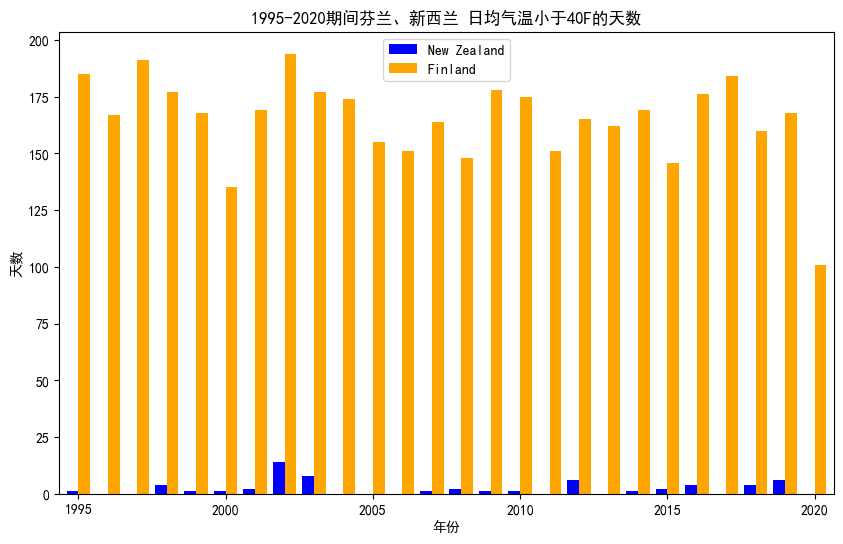

In [22]:
fig_data1 =data1[(data1['Country'].isin(["Finland",'New Zealand'])) & (data1['AvgTemperature']<40)][['Country','Year','AvgTemperature']]
fig_data2 =fig_data1 .groupby(['Country','Year'])['AvgTemperature'].count().unstack().T
y1=fig_data2.iloc[:,-1]
y2=fig_data2.iloc[:,-2]
plt.figure(figsize=(10,6))
plt.margins(x=0.01)
#画图
plt.title('1995-2020期间芬兰、新西兰 日均气温小于40F的天数')
plt.xlabel('年份')
plt.ylabel('天数')
plt.bar(y1.index-0.2, y1, color='blue',width=0.4, label='New Zealand')
plt.bar(y2.index+0.2, y2, color='orange',width=0.4, label='Finland')
plt.legend(loc='upper center')
plt.show()











# 4  饼图

### 练习4-1：绘制各地区（Region）气温>80度的比例，用饼图
    提醒：按地区分组计数count

In [67]:
fig_data=data1.loc[data1['AvgTemperature']>80 ,['Region','AvgTemperature'] ]
fig_data1=fig_data.groupby(by='Region').count()                  #各地区的记录个数
fig_data1

,AvgTemperature
Region,
Africa,71686
Asia,115955
Australia/South Pacific,1492
Europe,7125
Middle East,14136


In [45]:
fig_data1.values
# fig_data1['Proportion']=fig_data1.values/fig_data1.values.sum()


array([[ 71686],
       [115955],
       [  1492],
       [  7125],
       [ 14136]])

([<matplotlib.patches.Wedge at 0x27b98c77b90>,
 [Text(0.9499306528550571, 1.7372483284684335, 'Africa'),
  Text(-1.4745665342945207, -1.3213831904253386, 'Asia'),
  Text(1.567559526438317, -1.2096103219931946, 'Australia/South Pacific'),
  Text(1.7098114250947518, -0.9984712768104324, 'Europe'),
  Text(1.9360551441734721, -0.41483789450752545, 'Middle East')],
 [Text(0.5181439924663948, 0.9475899973464182, '34%'),
  Text(-0.8043090187061022, -0.72075446750473, '55%'),
  Text(0.8550324689663548, -0.6597874483599243, '1%'),
  Text(0.9326244136880464, -0.544620696442054, '3%'),
  Text(1.0560300786400756, -0.22627521518592297, '7%')])

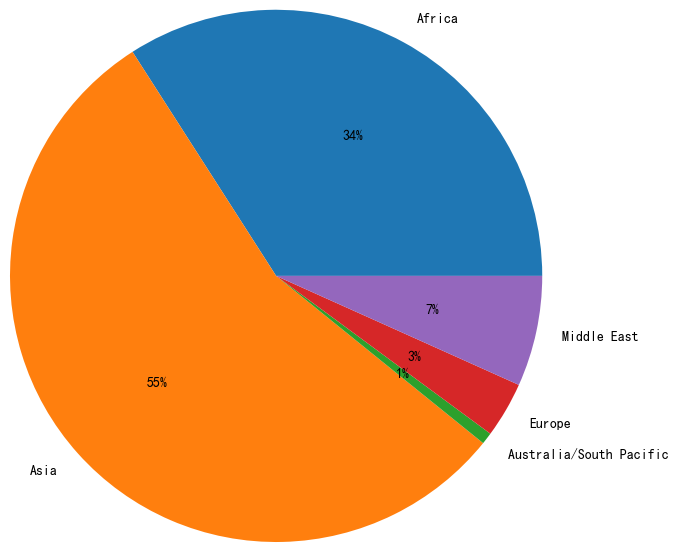

In [78]:
#画图
# plt.pie(fig_data1['Proportion'], labels=fig_data1.index, autopct='%.0f%%')
plt.pie(fig_data1.values.reshape(-1,), labels=fig_data1.index, autopct='%.0f%%',radius=1.8)







# 5 箱型图

### 练习5-1 按年统计葡萄牙( Country是Portugal )的气温最大值，并绘制对应的箱线图。

<Axes: >

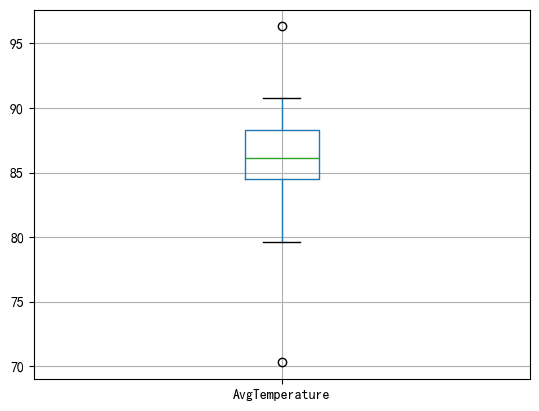

In [63]:
fig_data1 =data1[ data1['Country']=="Portugal"][['Year','AvgTemperature']]
fig_data2 =fig_data1 .groupby(by='Year')['AvgTemperature'].max()

#Pandas绘图
# df=pd.Series(fig_data2)
# df.plot(kind='box')
df=pd.DataFrame(fig_data2)
df.boxplot()






### 练习5-2 ：绘制柱形图，各年（Finland、New Zealand）日均气温低于40F的天数，数据在“小于40的统计结果.csv”中

<Axes: xlabel='Year'>

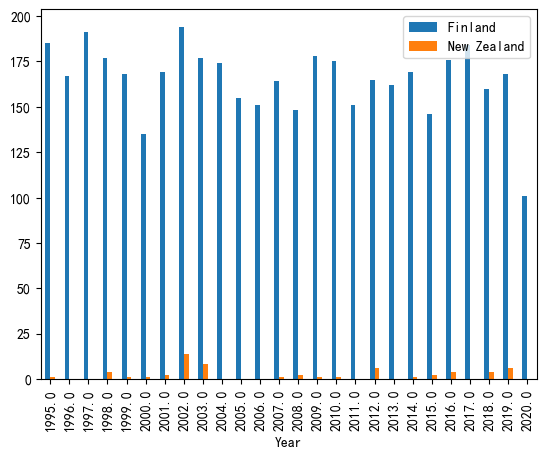

In [58]:
#用pandas绘制柱形图，各年（Finland、New Zealand）日均气温低于40F的天数，数据在“小于40的统计结果.csv”中
data=pd.read_csv(r'小于40的统计结果.csv',engine='python')
data.set_index("Year",inplace=True)

#画图
data.plot(kind='bar')

